In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import itertools
from dadapy.feature_weighting import FeatureWeighting

/home/romi/anaconda3/envs/dii_ms_test1/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from  matplotlib import font_manager
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.weight'] = 'light'
plt.rcParams['font.size'] = 15
plt.rcParams["axes.labelweight"] = "light"
plt.rcParams["axes.labelsize"] = 17
plt.rcParams["axes.linewidth"] = 0.5

In [3]:
def normalize(v):
    norm = np.linalg.norm(v)
    if norm.any == 0: 
        return v
    return v / norm

# I) 10 Gaussian random variables 

## Create

In [4]:
N = 1500 #points
d=10 #dimension
cov = np.identity(10)
mean = np.zeros(10)
np.random.seed(seed=9)
Xori = np.random.multivariate_normal(mean = mean, cov = cov, size = (N))  #unweighted input
weights=np.ones(10)*(0.01**2)
weights[0:5]=[5,2,1,1,0.5]
weights
X = Xori*weights #weighted target/ ground truth

## Produce / Import the results which where optimized in two settings: 
- with exponentially decaying learning rate and 
- with cosine decaying learning rate

These optimizations take 1-2 hours on a regular work station, because we consider relatively many points (1500) and optimize over extremely many periods. In general, far less periods (< 100) are suitable. 

If you want to reproduce the optimization, please uncomment the following cell. Otherwise skip it and proceed with the following cells, loading our saved results

In [5]:
# The L1 penalty strengths of the optimizations

lassos_ori = np.array([0] + list(
    np.logspace(
        np.floor(np.log10((1 / 50.) / 1000)),
        np.ceil(np.log10((1 / 50.) * 1.5)),
        25,
    )))

In [ ]:
# # Optimization

# n_epochs = 800
# f = FeatureWeighting(coordinates=Xori, verbose=True)
# f_target = FeatureWeighting(coordinates=X)
# optilr = f.return_optimal_learning_rate(target_data = f_target, n_epochs = 100, n_samples=700, trial_learning_rates=np.array([ 10., 50., 100., 200.]))

# # Exponentially decaying learning rate
# (
#     num_exp,
#     lassos_exp,
#     ii0_exp,
#     ww0_exp,
# ) = f.return_lasso_optimization_dii_search(
#     target_data=f_target,
#     l1_penalties=lassos_ori,
#     initial_weights=None,  # (default) set automatically
#     n_epochs=n_epochs,
#     learning_rate=50., 
#     decaying_lr="exp",
#     refine=False,  # only 10 values of the L1 strength are tested
#     plotlasso=True,  # automatically show DII vs number of non-zero features
# )
# ii0_perl1_perepoch_exp = f.history['dii_per_l1_per_epoch']
# ww0_perl1_perepoch_exp = f.history['weights_per_l1_per_epoch']
# # np.save('./PLOTDATA/num_nonzero_small',num_exp)
# # np.save('./PLOTDATA/l1o_small',lassos_exp)
# # np.save('./PLOTDATA/diio_small',ii0_exp)
# # np.save('./PLOTDATA/weightso_small',ww0_exp)
# # np.save('./PLOTDATA/dii_per_l1_per_epoch_small', ii0_perl1_perepoch_exp)
# # np.save('./PLOTDATA/weights_per_l1_per_epoch_small', ww0_perl1_perepoch_exp)

# # Cosine decaying learning rate
# (
#     num_cos,
#     lassos_cos,
#     ii0_cos,
#     ww0_cos,
# ) = f.return_lasso_optimization_dii_search(
#     target_data=f_target,
#     l1_penalties=lassos_ori,
#     initial_weights=None,  # (default) set automatically
#     n_epochs=n_epochs,
#     learning_rate=50., 
#     decaying_lr="cos",
#     refine=False,  # only 10 values of the L1 strength are tested
#     plotlasso=True,  # automatically show DII vs number of non-zero features
# )
# ii0_perl1_perepoch_cos = f.history['dii_per_l1_per_epoch']
# ww0_perl1_perepoch_cos = f.history['weights_per_l1_per_epoch']
# # np.save('./PLOTDATA/COS/num_nonzero_small',num_cos)
# # np.save('./PLOTDATA/COS/l1o_small',lassos_cos)
# # np.save('./PLOTDATA/COS/diio_small',ii0_cos)
# # np.save('./PLOTDATA/COS/weightso_small',ww0_cos)
# # np.save('./PLOTDATA/COS/dii_per_l1_per_epoch_small', ii0_perl1_perepoch_cos)
# # np.save('./PLOTDATA/COS/weights_per_l1_per_epoch_small', ww0_perl1_perepoch_cos)



In [6]:
# Load the data

#EXPONENTIAL decay results
ii0_exp = np.load("./PLOTDATA/diio_small.npy") # DIIs for each number of non-zero features
ww0_exp = np.load("./PLOTDATA/weightso_small.npy") # according weights
lassos_exp = np.load("./PLOTDATA/l1o_small.npy") # the L1 penalty strength for above results
num_exp = np.load("./PLOTDATA/num_nonzero_small.npy") # the available numbers of non-zero features
ii0_perl1_perepoch_exp = np.load("./PLOTDATA/dii_per_l1_per_epoch_small.npy") # the optimization for each ii0_exp
ww0_perl1_perepoch_exp = np.load("./PLOTDATA/weights_per_l1_per_epoch_small.npy") # the optimization for each set of ww0_exp

#COSINE decay results
ii0_cos = np.load("./PLOTDATA/COS/diio_small.npy")
ww0_cos = np.load("./PLOTDATA/COS/weightso_small.npy")
lassos_cos = np.load("./PLOTDATA/COS/l1o_small.npy")
num_cos = np.load("./PLOTDATA/COS/num_nonzero_small.npy")
ii0_perl1_perepoch_cos = np.load("./PLOTDATA/COS/dii_per_l1_per_epoch_small.npy")
ww0_perl1_perepoch_cos = np.load("./PLOTDATA/COS/weights_per_l1_per_epoch_small.npy")

## Merge the two sets of results
According to lowest DII if they have the same number of non-zero features

In [7]:
# Intercollate exponential decay resulting DIIs and cosine annealing ones (for Fig.1 AIII)

#deep copies of the arrays (by using 1*)
ii0 = 1*ii0_exp #DIIs
ww0 = 1*ww0_exp #weights
lassos0 = 1*lassos_exp #L1 strengths
num_nonzero_features0 = 1*num_exp
decaytype0 = np.full(ii0.shape, 0.) #0 is exponential decay
decaytype0[np.where(np.isnan(ii0))] = np.nan

for i, number in enumerate(num_exp):
    if (num_cos[i] == number and ii0_cos[i] < ii0_exp[i]) or (np.isnan(num_exp[i]) and not np.isnan(num_cos[i])):
        decaytype0[i] = 1. # 1 means cosine annealing decay
        ii0[i] = 1*ii0_cos[i]
        ww0[i] = 1*ww0_cos[i]
        lassos0[i] = 1*lassos_cos[i]
        num_nonzero_features0[i] = 1*num_cos[i]
        

# Extract the dii and weight optimizations for each of the non-zero feature results (for Fig.1 AI)

# find indices of L1 strengths used for the results?
lassoindices = np.ones(ii0.shape) * np.nan
for i, lasso in enumerate(lassos0):
    j = np.where(np.round(lassos_ori,7) == np.round(lasso,7))[0]
    if j.size != 0:
        lassoindices[i] = j[0]
# now extract the correct optimizations of diis and weights:
epochs= ii0_perl1_perepoch_exp.shape[1]
features = ww0_perl1_perepoch_exp.shape[2]
ii_evolutions = np.ones((len(ii0), epochs)) * np.nan
ww_evolutions = np.ones((len(ii0), epochs, features)) * np.nan

for i, lassind in enumerate(lassoindices):
    if decaytype0[i] == 0.: #extract from the exponential decay
        ii_evolutions[i] = ii0_perl1_perepoch_exp[int(lassind)]
        ww_evolutions[i] = ww0_perl1_perepoch_exp[int(lassind)]
    elif decaytype0[i] == 1.: #extract from the cosine decay
        ii_evolutions[i] = ii0_perl1_perepoch_cos[int(lassind)]
        ww_evolutions[i] = ww0_perl1_perepoch_cos[int(lassind)]

## overlap (cosine similarity) between groundtruth and lasso results

In [8]:
overlap_0 = []
for i in range(len(ww0)):
    overl = np.dot(normalize(ww0[i]), normalize(weights))
    overlap_0.append(overl)

## plot

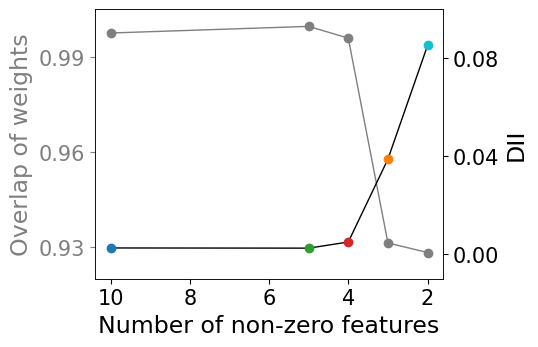

In [9]:
from matplotlib.ticker import NullFormatter
fig,ax = plt.subplots(figsize=(4.5, 3.5))
features = [0,5,6,7,8] # selected plot points

# Overlaps
ov = np.array(overlap_0)[features]
nn0= np.linalg.norm(ww0[features], ord=0, axis=1).astype(int)
ax.plot(nn0, ov, "-o",color="tab:gray", linewidth=1)
ax.set_xlabel("Number of non-zero features")
ax.set_ylabel("Overlap of weights",color="tab:gray")
ax.tick_params(axis='y', colors="tab:gray")
ax.set_ylim(0.92,1.005)
ax.invert_xaxis()
plt.yticks([0.93,0.96,0.99])


# DIIs
endimbalances = ii0[features]
ax2=ax.twinx()
ax2.plot(nn0, endimbalances, "-",color="black", linewidth=1, zorder=1)
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:orange', 'tab:cyan']
counter=0
for y, c in zip(endimbalances, colors):
    plt.scatter(nn0[counter], y, color=c)
    counter +=1
ax2.set_ylabel("DII")
ax2.set_ylim(-0.01,0.1)
plt.xticks([10,8,6,4,2])
plt.yticks([0.,0.04,0.08])
plt.show()

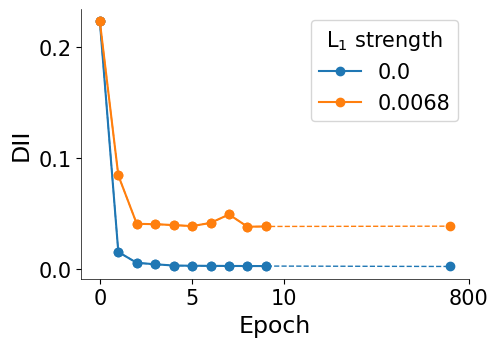

In [10]:
# plot the base (without L1 regularization) and L1=0.0068 results

till=20 # length of plot axis

# L1=0.0068
num = 7 # index of L1=0.0068
besti0 = 1*ii_evolutions[num][:till]
besti0[till-10:till] = np.nan
besti0[till-1] = 1*ii_evolutions[num][800]
# to connect trough missing values:
bestimask0 = np.isfinite(besti0)

# Unregularized
base = 1*ii_evolutions[0][:till]
base[till-10:till] = np.nan
base[till-1] = 1*ii_evolutions[0][800]

fig, ax = plt.subplots(figsize=(5, 3.5)) 
# Unregularized
plt.plot(np.arange(len(base))[bestimask0], base[bestimask0], 'o--', linewidth=1., color="tab:blue")
plt.plot(base[:till-9], 'o-',label=lassos0[0], linewidth=1.5, color="tab:blue")
# L1=0.007
plt.plot(np.arange(len(besti0))[bestimask0], besti0[bestimask0], 'o--', linewidth=1., color="tab:orange")
plt.plot(besti0[:till-9], 'o-',label=np.round(lassos0[num],4), linewidth=1.5, color="tab:orange")

plt.legend(title = "L$_1$ strength")
plt.xlabel("Epoch")
plt.ylabel("DII")
plt.xlim(-1,till)
plt.xticks([0,5,10,20], labels=[0,5,10,800])
plt.yticks([0.,0.1,0.2])
ax.spines[['right', 'top']].set_visible(False)
plt.show()

### the insets of the data point clouds

In [11]:
# for plotting the insets in Fig.1 AI, make pandas frames of the data:
dims = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10']
Xpd = pd.DataFrame(X, columns=dims)
Xoripd = pd.DataFrame(Xori, columns=dims)

/home/romi/anaconda3/envs/dii_ms_test1/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


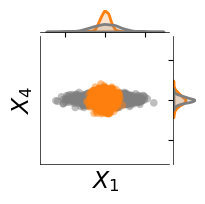

/home/romi/anaconda3/envs/dii_ms_test1/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


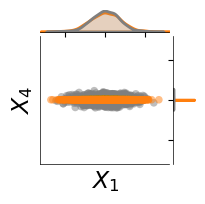

/home/romi/anaconda3/envs/dii_ms_test1/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


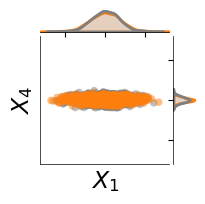

In [ ]:
# Find the correct scaling weights for the point clouds

gtvector0 = 1*weights
# Normalized weights
weightslist_gt_0_10_50 = []
weightslist_gt_0_10_50.append(normalize(gtvector0)) # normalized gt weights
#also the weights of the beginning, epoch 1 and epoch 3:
optipoints = [0, 1, 3]
for i in ww_evolutions[num][optipoints]:
    weightslist_gt_0_10_50.append(normalize(i))
    
pandaslist0 = []
for i in weightslist_gt_0_10_50:
    Xori_subset = Xori * i
    Xori_subsetpd = pd.DataFrame(Xori_subset[:,[0,3]], columns=['$X_1$', '$X_4$']) #np.array(nameslist)[[20,47]]
    pandaslist0.append(Xori_subsetpd)

# Plot

for i in range(1,len(optipoints)+1):
    concatenated = pd.concat([pandaslist0[0].assign(Weights='Ground truth'), pandaslist0[i].assign(Weights='Optimized')])
    #sns.scatterplot(x='Std', y='ATR', data=concatenated, hue='Asset Subclass', style='dataset')

    g = sns.JointGrid(data=concatenated, x="$X_1$", y="$X_4$", height=2, xlim=(-4,4), ylim=(-4,4), hue='Weights', palette=['tab:gray','tab:orange'])
    g.plot_joint(sns.scatterplot, s=30, alpha=0.5, linewidth=0)
    g.plot_marginals(sns.kdeplot, fill=True, alpha=0.2, linewidth=2)
    g.ax_joint.tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)
    g.ax_joint.legend_.remove()
    plt.show()

### for Table 1

In [14]:
features = [0,5,6,7,8]
for i, feat in enumerate (features):
    print("l1: ",np.round(lassos0[feat],5)," norm: ", num_nonzero_features0[feat].astype(int), " imb: ", np.round(ii0[feat],3), " weights: ", (ww0[feat]/np.max(ww0[feat]))*5)

l1:  0.0  norm:  10  imb:  0.003  weights:  [5.00e+00 2.31e+00 1.22e+00 1.23e+00 6.10e-01 2.09e-10 9.49e-12 9.94e-09
 1.50e-09 8.33e-09]
l1:  0.0001  norm:  5  imb:  0.002  weights:  [5.   2.11 1.1  1.1  0.54 0.   0.   0.   0.   0.  ]
l1:  0.00022  norm:  4  imb:  0.005  weights:  [5.   2.01 1.06 1.06 0.   0.   0.   0.   0.   0.  ]
l1:  0.00681  norm:  3  imb:  0.039  weights:  [5.   0.47 0.   0.23 0.   0.   0.   0.   0.   0.  ]
l1:  0.01  norm:  2  imb:  0.085  weights:  [5.   0.55 0.   0.   0.   0.   0.   0.   0.   0.  ]


# II) 285 polynomials of ten Gaussian random variables

## Create

In [15]:
# make the new input data, all 285 polynomials
ts = range(10)
polylist = []
for i in [1,2,3]:
    polylist = polylist + list(itertools.combinations_with_replacement(ts,i))

Xori2 = np.empty((Xori.shape[0],len(polylist))) # The unscaled input features
for i, poly in enumerate(polylist):
    data = np.prod(Xori[:, poly], axis=1)
    Xori2[:,i] = data 

# the variable name combinations
tsnames = ['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10']
polylist = []
for i in [1,2,3]:
    polylist = polylist + list(itertools.combinations_with_replacement(tsnames,i))
nameslist = ['*'.join(item) for item in polylist]

# Ground truth: Random 10 features from these 285 and weights
gtlist = [5,20,47,280,100,11,4,2,9,7]
weights2 = [5,5,1,2,7,3,10,6,4,1]
X2 = Xori2[:,gtlist] * weights2

In [16]:
# Zip weight and variable name
zipped = list(zip(np.array(weights2).astype(str), np.array(nameslist)[gtlist]))
nameslist_gt = ['*'.join(item) for item in zipped]

# Zip feature index, weight and name, sorted by weight
order = np.argsort(weights2)[::-1]
zipped = list(zip(np.array(weights2).astype(str)[order], np.array(nameslist)[gtlist][order]))
list_gt = ['*'.join(item) for item in zipped]
zipped2 = list(zip(np.array(gtlist).astype(str)[order], list_gt))
list_gt = ['__'.join(item) for item in zipped2]

## Produce / Import the results which where optimized in two settings: 
- with exponentially decaying learning rate and 
- with cosine decaying learning rate

These optimizations take several hours on a regular work station (over night), because we consider relatively many points (1500) and optimize over extremely many periods. In general, far less periods (< 100) are suitable. 

If you want to reproduce the optimization, please uncomment the following cell. Otherwise skip it and proceed with the following cells, loading our saved results

In [17]:
# The L1 penalty strengths of the optimizations

lassos_ori_big = [0] + list(
    np.logspace(
        np.floor(np.log10((1 / 200.) / 1000)),
        np.ceil(np.log10((1 / 200.) * 1.5)),
        20,
    ))

In [ ]:
# # Optimizations
# n_epochs = 800  # number of training epochs
# ff = FeatureWeighting(coordinates=Xori2, verbose=True)
# ff_target = FeatureWeighting(coordinates=X2)
# optilr2 = ff.return_optimal_learning_rate(target_data = ff_target, n_epochs = 300, n_samples=600, trial_learning_rates=np.array([ 10., 50., 100., 200.]))

# # Exponentially decaying learning rate
# (
#     num_exp,
#     lassos_exp,
#     ii0_exp,
#     ww0_exp,
# ) = ff.return_lasso_optimization_dii_search(
#     target_data=ff_target,
#     l1_penalties=lassos_ori_big,
#     initial_weights=None,  # (default) set automatically
#     n_epochs=n_epochs,
#     learning_rate=optilr2, 
#     decaying_lr="exp",
#     refine=False,  # only 10 values of the L1 strength are tested
#     plotlasso=True,  # automatically show DII vs number of non-zero features
# )
# # ii0_perl1_perepoch_exp = ff.history['dii_per_l1_per_epoch']
# # ww0_perl1_perepoch_exp = ff.history['weights_per_l1_per_epoch']
# # np.save('./PLOTDATA/num_nonzero2',num_exp)
# # np.save('./PLOTDATA/l1o2',lassos_exp)
# # np.save('./PLOTDATA/diio2',ii0_exp)
# # np.save('./PLOTDATA/weightso2',ww0_exp)
# # np.save('./PLOTDATA/dii_per_l1_per_epoch', ii0_perl1_perepoch_exp)
# # np.save('./PLOTDATA/weights_per_l1_per_epoch', ww0_perl1_perepoch_exp)

# # Cosine decaying learning rate
# (
#     num_cos,
#     lassos_cos,
#     ii0_cos,
#     ww0_cos,
# ) = ff.return_lasso_optimization_dii_search(
#     target_data=ff_target,
#     l1_penalties=lassos_ori_big,
#     initial_weights=None,  # (default) set automatically
#     n_epochs=n_epochs,
#     learning_rate=optilr2, 
#     decaying_lr="exp",
#     refine=False,  # only 10 values of the L1 strength are tested
#     plotlasso=True,  # automatically show DII vs number of non-zero features
# )
# ii0_perl1_perepoch_cos = ff.history['dii_per_l1_per_epoch']
# ww0_perl1_perepoch_cos = ff.history['weights_per_l1_per_epoch']
# # np.save('./PLOTDATA/COS/num_nonzero2',num_cos)
# # np.save('./PLOTDATA/COS/l1o2',lassos_cos)
# # np.save('./PLOTDATA/COS/diio2',ii0_cos)
# # np.save('./PLOTDATA/COS/weightso2',ww0_cos)
# # np.save('./PLOTDATA/COS/dii_per_l1_per_epoch', ii0_perl1_perepoch_cos)
# # np.save('./PLOTDATA/COS/weights_per_l1_per_epoch', ww0_perl1_perepoch_cos)

In [18]:
#EXPONENTIAL decay results
ii0_exp = np.load("./PLOTDATA/diio2.npy") ## DIIs for each number of non-zero features
ww0_exp = np.load("./PLOTDATA/weightso2.npy") # according weights
lassos_exp = np.load("./PLOTDATA/l1o2.npy") # the L1 penalty strength for above results
num_exp = np.load("./PLOTDATA/num_nonzero2.npy") # the available numbers of non-zero features
ii0_perl1_perepoch_exp = np.load("./PLOTDATA/dii_per_l1_per_epoch.npy") # the optimization for each ii0_exp
ww0_perl1_perepoch_exp = np.load("./PLOTDATA/weights_per_l1_per_epoch.npy") # the optimization for each set of ww0_exp

#COSINE Annealing results
ii0_cos = np.load("./PLOTDATA/COS/diio2.npy")
ww0_cos = np.load("./PLOTDATA/COS/weightso2.npy")
lassos_cos = np.load("./PLOTDATA/COS/l1o2.npy")
num_cos = np.load("./PLOTDATA/COS/num_nonzero2.npy")
ii0_perl1_perepoch_cos = np.load("./PLOTDATA/COS/dii_per_l1_per_epoch.npy")
ww0_perl1_perepoch_cos = np.load("./PLOTDATA/COS/weights_per_l1_per_epoch.npy")

## Merge the two sets of results
According to lowest DII if they have the same number of non-zero features

In [19]:
# Intercollate exponential decay resulting DIIs and cosine annealing ones (for Fig.1 AIII)

#deep copies of the arrays (by using 1*)
ii = 1*ii0_exp
ww = 1*ww0_exp
lassos = 1*lassos_exp
num_nonzero_features = 1*num_exp
decaytype = np.full(ii.shape, 0.) #0 is exponential decay
decaytype[np.where(np.isnan(ii))] = np.nan


for i, number in enumerate(num_exp):
    if (num_cos[i] == number and ii0_cos[i] < ii0_exp[i]) or (np.isnan(num_exp[i]) and not np.isnan(num_cos[i])):
        decaytype[i] = 1. # 1 means cosine annealing decay
        ii[i] = 1*ii0_cos[i]
        ww[i] = 1*ww0_cos[i]
        lassos[i] = 1*lassos_cos[i]
        num_nonzero_features[i] = 1*num_cos[i]
        

# Extract the dii and weight optimizations for each of the non-zero feature results (for Fig.1 AI)

# which L1 strengths were used for the results?
lassoindices = np.ones(ii.shape) * np.nan
for i, lasso in enumerate(lassos):
    j = np.where(np.round(lassos_ori_big,7) == np.round(lasso,7))[0]
    if j.size != 0:
        lassoindices[i] = j[0]

# now extract the correct ones:
epochs= ii0_perl1_perepoch_exp.shape[1]
features = ww0_perl1_perepoch_exp.shape[2]
ii_evolutions2 = np.ones((len(ii), epochs)) * np.nan
ww_evolutions2 = np.ones((len(ii), epochs, features)) * np.nan

for i, lassind in enumerate(lassoindices):
    if decaytype[i] == 0.: #extract from the exponential decay
        ii_evolutions2[i] = ii0_perl1_perepoch_exp[int(lassind)]
        ww_evolutions2[i] = ww0_perl1_perepoch_exp[int(lassind)]
    elif decaytype[i] == 1.: #extract from the cosine decay
        ii_evolutions2[i] = ii0_perl1_perepoch_cos[int(lassind)]
        ww_evolutions2[i] = ww0_perl1_perepoch_cos[int(lassind)]

## overlap (cosine similarity) between groundtruth and lasso results

In [20]:
# ground truth vector of 285 dimensions, mostly 0's
elements = 1*gtlist
gtvector = np.zeros(Xori2.shape[1])
for i, element in enumerate(elements):
    gtvector[element] = weights2[i] 

# overlap
overlap = []
for i in range(len(ww)):
    overl = np.dot(normalize(ww[i]), normalize(gtvector))
    overlap.append(overl)

## plot

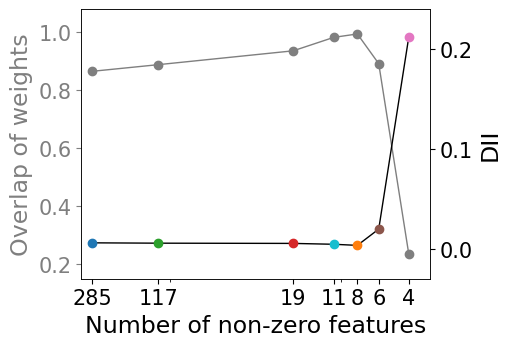

In [21]:
from matplotlib.ticker import NullFormatter
fig,ax = plt.subplots(figsize=(4.5, 3.5))
features = [0,168,266,274, 277, 279, 281] # selected points to plot

# Cosine similarities / overlap
nn= np.linalg.norm(ww[features], ord=0, axis=1).astype(int)
ov2 = np.array(overlap)[features]
ax.plot(nn, ov2, "o-",color="tab:gray", linewidth=1)
ax.set_xlabel("Number of non-zero features")
ax.set_ylabel("Overlap of weights",color="tab:gray")
ax.tick_params(axis='y', colors="tab:gray")
ax.set_xscale('symlog')
ax.xaxis.set_major_formatter(NullFormatter())
ax.xaxis.set_minor_formatter(NullFormatter())
ax.set_xticks(num_nonzero_features[features].astype(int), labels=num_nonzero_features[features].astype(int))
ax.set_ylim(0.15,1.08)
ax.invert_xaxis()
ax.set_xlim(330,3)
plt.yticks([0.2,0.4,0.6,0.8,1.0])


# DIIs
endimbalances = ii[features]
ax2=ax.twinx()
ax2.plot(nn, endimbalances, "-",color="black", linewidth=1, zorder=1)
colors = ['tab:blue', 'tab:green', 'tab:red', 'tab:cyan','tab:orange', 'tab:brown', 'tab:pink']
counter=0
for y, c in zip(endimbalances, colors):
    plt.scatter(nn[counter], y, color=c)
    counter +=1
ax2.set_ylabel("DII")
ax2.set_ylim(-0.03,0.24)
plt.yticks([0.,0.1,0.2])
plt.show()

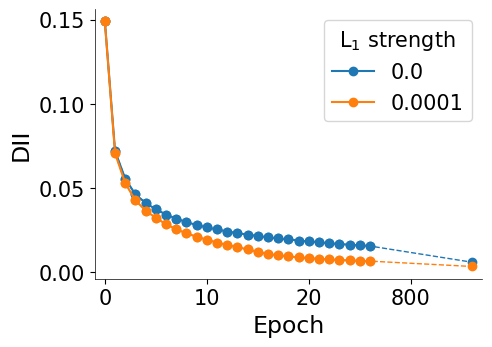

In [22]:
# plot without L1 regularization and L1=0.0001 results: orange point

till=37 # length of plot axis

# L1=0.0001
num = 277
besti0 = 1*ii_evolutions2[num][:till]
besti0[till-10:till] = np.nan
besti0[till-1] = 1*ii_evolutions2[num][800]
# to connect trough missing values:
bestimask0 = np.isfinite(besti0)

# Unregularized
base = 1*ii_evolutions2[0][:till]
base[till-10:till] = np.nan
base[till-1] = 1*ii_evolutions2[0][800] 

fig, ax = plt.subplots(figsize=(5, 3.5)) #plt.figure(figsize=(5, 4))
# Unregularized
plt.plot(np.arange(len(base))[bestimask0], base[bestimask0], 'o--', linewidth=1., color="tab:blue")
plt.plot(base[:till-9], 'o-',label=lassos[0], linewidth=1.5, color="tab:blue")

# L1=0.0001
plt.plot(np.arange(len(besti0))[bestimask0], besti0[bestimask0], 'o--', linewidth=1., color="tab:orange")
plt.plot(besti0[:till-9], 'o-',label=np.round(lassos[num],4), linewidth=1.5, color="tab:orange")

plt.legend(title = "L$_1$ strength")
plt.xlabel("Epoch")
plt.ylabel("DII")
plt.xlim(-1,till)
plt.xticks([0,10,20, 30], labels=[0,10,20,800])
plt.yticks([0.,0.05, 0.1,0.15])
ax.spines[['right', 'top']].set_visible(False)
plt.show()

### the insets of the data point clouds

In [23]:
# Make pandas for insets with data clouds in Fig.1 BI
Xori2pd = pd.DataFrame(Xori2, columns=nameslist)
X2pd = pd.DataFrame(X2, columns=nameslist_gt)

/home/romi/anaconda3/envs/dii_ms_test1/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


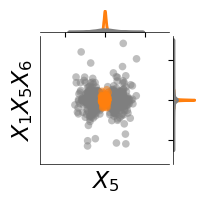

/home/romi/anaconda3/envs/dii_ms_test1/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


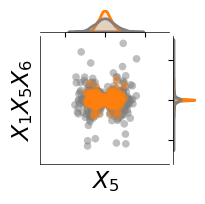

/home/romi/anaconda3/envs/dii_ms_test1/lib/python3.9/site-packages/seaborn/axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


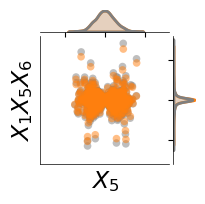

In [24]:
# Find the correct scaling weights for the point clouds
num=277
gtvector = np.zeros(Xori2.shape[1])
for i, element in enumerate(gtlist):
    gtvector[element] = weights2[i] 
# Normalized weights
weightslist_gt_0_10_50 = []
weightslist_gt_0_10_50.append(normalize(gtvector)) # normalized gt weights
#also the weights of the beginning, epoch 3 and epoch 50:
optipoints = [0, 9, 800]
for i in ww_evolutions2[num][optipoints]:
    weightslist_gt_0_10_50.append(normalize(i))   
pandaslist = []
for i in weightslist_gt_0_10_50:
    Xori2_subset = Xori2 * i
    Xori2_subsetpd = pd.DataFrame(Xori2_subset[:,[4,100]], columns=['$X_5$', '$X_1X_5X_6$']) #np.array(nameslist)[[20,47]]
    pandaslist.append(Xori2_subsetpd)
    
# Plot   
for i in range(1, len(optipoints)+1):
    concatenated = pd.concat([pandaslist[0].assign(Weights='Ground truth'), pandaslist[i].assign(Weights='Optimized')])
    g = sns.JointGrid(data=concatenated, x="$X_5$", y="$X_1X_5X_6$", height=2, xlim=(-4,4), ylim=(-4,4), hue='Weights', palette=['tab:gray','tab:orange'])
    g.plot_joint(sns.scatterplot, s=30, alpha=0.5, linewidth=0)
    g.plot_marginals(sns.kdeplot, fill=True, alpha=0.2, linewidth=2)
    g.ax_joint.tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)
    g.ax_joint.legend_.remove()
    plt.show()

### For Table 2

In [25]:
gtlist_sorted = [4, 100, 2, 20, 5, 9, 11, 280, 7, 47] #ground truth indices sorted descending by weight

otherelements = list(set(np.arange(285)) - set(gtlist))
optiweights = (ww.T/np.max(ww, axis=1)).T * 10
features = [0,168,266,274, 277, 279, 281, 284]
for i, feat in enumerate (features):
    print("l1: ",np.round(lassos[feat],7)," norm: ", num_nonzero_features[feat].astype(int), " imb: ", np.round(ii[feat],3)," sum rest: ", np.round(np.nansum(optiweights[feat,otherelements]),1), " weights: ", np.round(optiweights[feat, gtlist_sorted],1))

l1:  0.0  norm:  285  imb:  0.006  sum rest:  72.4  weights:  [10.   6.2  6.9  2.9  6.1  5.1  2.2  2.5  0.8  0.7]
l1:  4.3e-06  norm:  117  imb:  0.006  sum rest:  53.0  weights:  [10.   6.2  6.9  2.9  6.1  5.1  2.2  2.4  0.8  0.7]
l1:  0.0005456  norm:  19  imb:  0.005  sum rest:  8.9  weights:  [10.   4.5  6.   1.8  5.1  4.   1.6  1.6  0.   0. ]
l1:  4.83e-05  norm:  11  imb:  0.005  sum rest:  2.6  weights:  [10.   6.2  6.5  3.7  5.6  4.5  3.1  2.1  0.7  0. ]
l1:  0.0001274  norm:  8  imb:  0.003  sum rest:  0.0  weights:  [10.   6.3  6.3  5.   5.4  4.3  3.   2.1  0.   0. ]
l1:  0.0014384  norm:  6  imb:  0.02  sum rest:  3.8  weights:  [10.   6.9  6.2  0.   5.7  3.2  0.   0.   0.   0. ]
l1:  0.0037927  norm:  4  imb:  0.212  sum rest:  10.0  weights:  [2.3 1.1 1.4 0.  0.  0.  0.  0.  0.  0. ]
l1:  0.0023357  norm:  1  imb:  0.606  sum rest:  0.0  weights:  [10.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
